In [508]:
import pandas as pd
import numpy as np
import requests as rq
from bs4 import BeautifulSoup

In [509]:
url = "https://www.basketball-reference.com/leagues/NBA_2020_totals.html"

In [510]:
req = rq.get(url)
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


In [511]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [512]:
table_str = str(table)
df = pd.read_html(table_str)[0]

In [513]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,32,32,891,157,258,...,.543,115,202,317,88,20,38,48,65,371
1,2,Bam Adebayo,C,22,MIA,35,35,1204,204,357,...,.687,92,283,375,155,47,43,101,93,543
2,3,LaMarcus Aldridge,C,34,SAS,32,32,1056,248,487,...,.844,70,182,252,76,19,61,44,74,620
3,4,Nickeil Alexander-Walker,SG,21,NOP,27,0,341,55,162,...,.688,4,51,55,46,9,4,26,31,150
4,5,Grayson Allen,SG,24,MEM,21,0,369,60,137,...,.889,3,47,50,30,5,1,20,31,173


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 30 columns):
Rk        504 non-null object
Player    504 non-null object
Pos       504 non-null object
Age       504 non-null object
Tm        504 non-null object
G         504 non-null object
GS        504 non-null object
MP        504 non-null object
FG        504 non-null object
FGA       504 non-null object
FG%       497 non-null object
3P        504 non-null object
3PA       504 non-null object
3P%       460 non-null object
2P        504 non-null object
2PA       504 non-null object
2P%       494 non-null object
eFG%      497 non-null object
FT        504 non-null object
FTA       504 non-null object
FT%       467 non-null object
ORB       504 non-null object
DRB       504 non-null object
TRB       504 non-null object
AST       504 non-null object
STL       504 non-null object
BLK       504 non-null object
TOV       504 non-null object
PF        504 non-null object
PTS       504 non-null ob

In [515]:
table = soup.find(name='table', attrs={'id':'confs_standings_W'})

In [516]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = rq.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


In [517]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,...,30,47,77,11,13,15,17,53,116,2013
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,...,68,128,196,36,18,27,32,80,209,2013
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,...,29,210,239,206,40,11,138,137,1057,2013
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,...,0,1,1,1,0,0,0,3,5,2013
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,...,30,90,120,9,5,23,23,60,100,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,473,Thaddeus Young,PF,31,CHI,35,0,759,121,306,...,51,101,152,66,36,9,52,65,303,2020
500,474,Trae Young,PG,21,ATL,33,33,1156,309,695,...,16,126,142,275,40,2,156,53,952,2020
501,475,Cody Zeller,C,27,CHO,35,20,811,155,287,...,103,157,260,43,22,15,52,89,406,2020
502,476,Ante Žižić,C,23,CLE,12,0,101,18,33,...,8,19,27,0,3,3,1,12,45,2020


In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 503
Data columns (total 31 columns):
Rk        5054 non-null object
Player    5054 non-null object
Pos       5054 non-null object
Age       5054 non-null object
Tm        5054 non-null object
G         5054 non-null object
GS        5054 non-null object
MP        5054 non-null object
FG        5054 non-null object
FGA       5054 non-null object
FG%       5019 non-null object
3P        5054 non-null object
3PA       5054 non-null object
3P%       4524 non-null object
2P        5054 non-null object
2PA       5054 non-null object
2P%       4981 non-null object
eFG%      5019 non-null object
FT        5054 non-null object
FTA       5054 non-null object
FT%       4789 non-null object
ORB       5054 non-null object
DRB       5054 non-null object
TRB       5054 non-null object
AST       5054 non-null object
STL       5054 non-null object
BLK       5054 non-null object
TOV       5054 non-null object
PF        5054 non-null ob

In [519]:
drop_indexes = df[df['Rk'] == 'Rk'].index
df.drop(drop_indexes, inplace=True)

In [520]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 503
Data columns (total 31 columns):
Rk        3833 non-null int64
Player    3833 non-null object
Pos       3833 non-null object
Age       3833 non-null int64
Tm        3833 non-null object
G         3833 non-null int64
GS        3833 non-null int64
MP        3833 non-null int64
FG        3833 non-null int64
FGA       3833 non-null int64
FG%       3805 non-null float64
3P        3833 non-null int64
3PA       3833 non-null int64
3P%       3426 non-null float64
2P        3833 non-null int64
2PA       3833 non-null int64
2P%       3776 non-null float64
eFG%      3805 non-null float64
FT        3833 non-null int64
FTA       3833 non-null int64
FT%       3628 non-null float64
ORB       3833 non-null int64
DRB       3833 non-null int64
TRB       3833 non-null int64
AST       3833 non-null int64
STL       3833 non-null int64
BLK       3833 non-null int64
TOV       3833 non-null int64
PF        3833 non-null int64
PTS       3

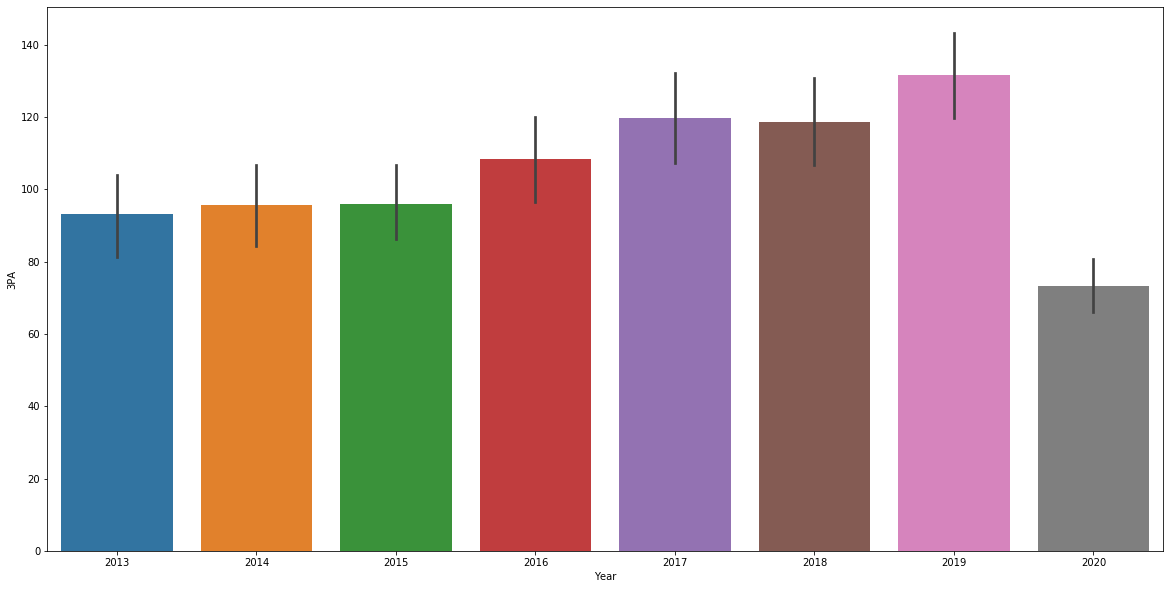

In [522]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x="Year", y="3PA", data=df)

In [523]:
sorted_df = df.sort_values(by=["3P"], axis=0, ascending=False)

In [524]:
sorted_df[["Player", "3P", "Year"]].head()

,Player,3P,Year
121,Stephen Curry,402,2016
277,James Harden,378,2019
165,Stephen Curry,354,2019
124,Stephen Curry,324,2017
249,Paul George,292,2019


In [525]:
grouped_df = df.groupby("Player", as_index=False).sum()
sorted_df = grouped_df.sort_values(by=["3P"], axis=0, ascending=False)

In [526]:
sorted_df_3p = sorted_df[["Player", "3P", "3PA"]].head()

In [527]:
sorted_df_3p

,Player,3P,3PA
946,Stephen Curry,1859,4269
441,James Harden,1646,4488
625,Klay Thompson,1411,3373
639,Kyle Korver,1408,3196
202,Damian Lillard,1401,3857


In [528]:
sorted_df_3p["Ratio 3P"] = sorted_df_3p["3P"] / sorted_df_3p["3PA"]

In [529]:
sorted_df_3p

,Player,3P,3PA,Ratio 3P
946,Stephen Curry,1859,4269,0.435465
441,James Harden,1646,4488,0.366756
625,Klay Thompson,1411,3373,0.418322
639,Kyle Korver,1408,3196,0.440551
202,Damian Lillard,1401,3857,0.363236


In [530]:
grouped_df = sorted_df_3p.groupby("Player", as_index=False).sum()
sorted_df = grouped_df.sort_values(by=["Ratio 3P"], axis=0, ascending=False)

In [531]:
sorted_df

,Player,3P,3PA,Ratio 3P
3,Kyle Korver,1408,3196,0.440551
4,Stephen Curry,1859,4269,0.435465
2,Klay Thompson,1411,3373,0.418322
1,James Harden,1646,4488,0.366756
0,Damian Lillard,1401,3857,0.363236


### Prever o MVP

In [532]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor
url = "https://www.basketball-reference.com/leagues/NBA_2020_totals.html"

In [533]:
req = rq.get(url)
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


In [534]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [535]:
table_str = str(table)
df = pd.read_html(table_str)[0]

In [536]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,32,32,891,157,258,...,.543,115,202,317,88,20,38,48,65,371
1,2,Bam Adebayo,C,22,MIA,35,35,1204,204,357,...,.687,92,283,375,155,47,43,101,93,543
2,3,LaMarcus Aldridge,C,34,SAS,32,32,1056,248,487,...,.844,70,182,252,76,19,61,44,74,620
3,4,Nickeil Alexander-Walker,SG,21,NOP,27,0,341,55,162,...,.688,4,51,55,46,9,4,26,31,150
4,5,Grayson Allen,SG,24,MEM,21,0,369,60,137,...,.889,3,47,50,30,5,1,20,31,173


In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 30 columns):
Rk        504 non-null object
Player    504 non-null object
Pos       504 non-null object
Age       504 non-null object
Tm        504 non-null object
G         504 non-null object
GS        504 non-null object
MP        504 non-null object
FG        504 non-null object
FGA       504 non-null object
FG%       497 non-null object
3P        504 non-null object
3PA       504 non-null object
3P%       460 non-null object
2P        504 non-null object
2PA       504 non-null object
2P%       494 non-null object
eFG%      497 non-null object
FT        504 non-null object
FTA       504 non-null object
FT%       467 non-null object
ORB       504 non-null object
DRB       504 non-null object
TRB       504 non-null object
AST       504 non-null object
STL       504 non-null object
BLK       504 non-null object
TOV       504 non-null object
PF        504 non-null object
PTS       504 non-null ob

In [538]:
drop_indexes = df[df['Rk'] == 'Rk'].index
df.drop(drop_indexes, inplace=True)
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 503
Data columns (total 30 columns):
Rk        481 non-null int64
Player    481 non-null object
Pos       481 non-null object
Age       481 non-null int64
Tm        481 non-null object
G         481 non-null int64
GS        481 non-null int64
MP        481 non-null int64
FG        481 non-null int64
FGA       481 non-null int64
FG%       474 non-null float64
3P        481 non-null int64
3PA       481 non-null int64
3P%       437 non-null float64
2P        481 non-null int64
2PA       481 non-null int64
2P%       471 non-null float64
eFG%      474 non-null float64
FT        481 non-null int64
FTA       481 non-null int64
FT%       444 non-null float64
ORB       481 non-null int64
DRB       481 non-null int64
TRB       481 non-null int64
AST       481 non-null int64
STL       481 non-null int64
BLK       481 non-null int64
TOV       481 non-null int64
PF        481 non-null int64
PTS       481 non-null int64
dtypes: floa

In [540]:
url_2 = "https://www.basketball-reference.com/leagues/NBA_2020_advanced.html"

In [541]:
req = rq.get(url_2)
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


In [542]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [543]:
table_str = str(table)
df_advanced = pd.read_html(table_str)[0]

In [544]:
drop_indexes = df_advanced[df_advanced['Rk'] == 'Rk'].index
df_advanced.drop(drop_indexes, inplace=True)
numeric_cols = df_advanced.columns.drop(['Player','Pos','Tm'])
df_advanced[numeric_cols] = df_advanced[numeric_cols].apply(pd.to_numeric)

In [545]:
df_advanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 503
Data columns (total 29 columns):
Rk             481 non-null int64
Player         481 non-null object
Pos            481 non-null object
Age            481 non-null int64
Tm             481 non-null object
G              481 non-null int64
MP             481 non-null int64
PER            481 non-null float64
TS%            475 non-null float64
3PAr           474 non-null float64
FTr            474 non-null float64
ORB%           481 non-null float64
DRB%           481 non-null float64
TRB%           481 non-null float64
AST%           481 non-null float64
STL%           481 non-null float64
BLK%           481 non-null float64
TOV%           478 non-null float64
USG%           481 non-null float64
Unnamed: 19    0 non-null float64
OWS            481 non-null float64
DWS            481 non-null float64
WS             481 non-null float64
WS/48          481 non-null float64
Unnamed: 24    0 non-null float64
OBPM      

In [546]:
final_df = df.merge(df_advanced)

In [547]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 480
Data columns (total 52 columns):
Rk             481 non-null int64
Player         481 non-null object
Pos            481 non-null object
Age            481 non-null int64
Tm             481 non-null object
G              481 non-null int64
GS             481 non-null int64
MP             481 non-null int64
FG             481 non-null int64
FGA            481 non-null int64
FG%            474 non-null float64
3P             481 non-null int64
3PA            481 non-null int64
3P%            437 non-null float64
2P             481 non-null int64
2PA            481 non-null int64
2P%            471 non-null float64
eFG%           474 non-null float64
FT             481 non-null int64
FTA            481 non-null int64
FT%            444 non-null float64
ORB            481 non-null int64
DRB            481 non-null int64
TRB            481 non-null int64
AST            481 non-null int64
STL            481 non-null int6

In [548]:
final_df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48',
       'Unnamed: 24', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [549]:
ws_df = final_df[["Player", "WS", "WS/48"]]
ws_df.describe()

,WS,WS/48
count,481.000000,481.000000
mean,1.129522,0.071322
std,1.307272,0.123493
min,-1.300000,-1.027000
25%,0.100000,0.033000
50%,0.800000,0.084000
75%,1.800000,0.126000
max,8.300000,0.461000


In [550]:
sorted_ws = ws_df.sort_values(by=["WS"], axis=0, ascending=False)


In [551]:
sorted_ws.head(10)

,Player,WS,WS/48
185,James Harden,8.3,0.311
10,Giannis Antetokounmpo,6.9,0.313
115,Anthony Davis,6.5,0.269
126,Luka Dončić,6.0,0.283
234,LeBron James,5.5,0.220
167,Rudy Gobert,5.3,0.223
279,Damian Lillard,5.2,0.199
76,Jimmy Butler,5.1,0.224
213,Richaun Holmes,4.7,0.212
1,Bam Adebayo,4.6,0.182


In [552]:
ws_df = ws_df[ws_df["WS"] >= 5]

In [553]:
sorted_ws48 = ws_df.sort_values(by=["WS/48"], axis=0, ascending=False)

In [554]:
sorted_ws48.head(10)

,Player,WS,WS/48
10,Giannis Antetokounmpo,6.9,0.313
185,James Harden,8.3,0.311
126,Luka Dončić,6.0,0.283
115,Anthony Davis,6.5,0.269
76,Jimmy Butler,5.1,0.224
167,Rudy Gobert,5.3,0.223
234,LeBron James,5.5,0.220
279,Damian Lillard,5.2,0.199


In [558]:
top5_sorted_ws = sorted_ws.head(10)
top5_sorted_ws48 = sorted_ws48.head(10)

Text(0.5, 1.0, 'Winning Score Top 5')

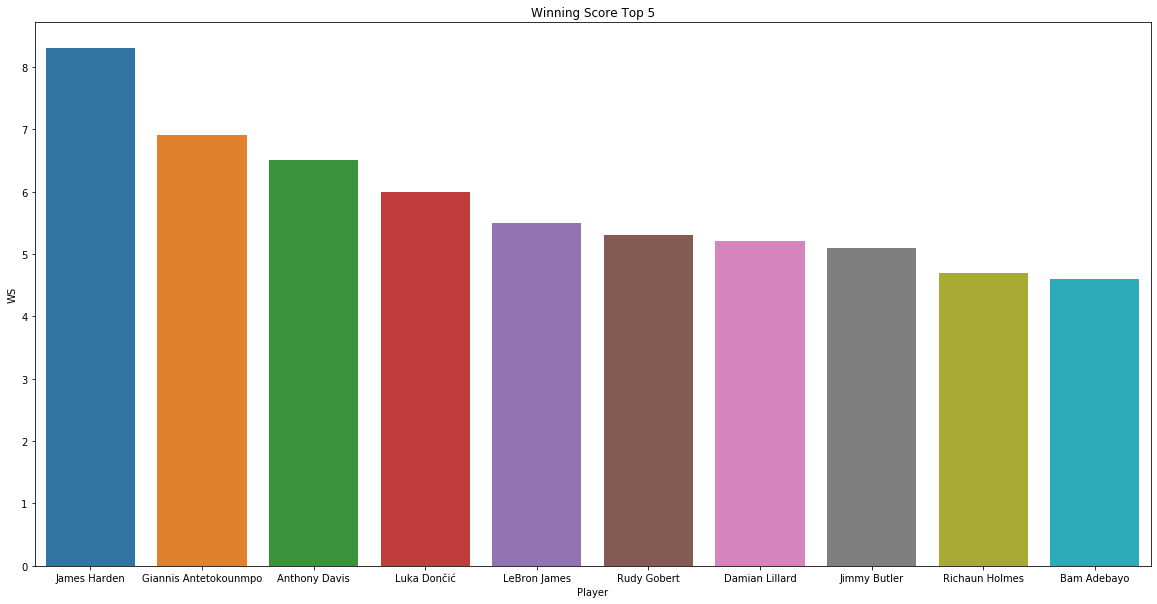

In [559]:
plt.figure(figsize=(20,10))
sns.barplot(x="Player", y="WS", data=top5_sorted_ws).set_title("Winning Score Top 5")

Text(0.5, 1.0, 'Winning Score per 48 minutes of game Top 5')

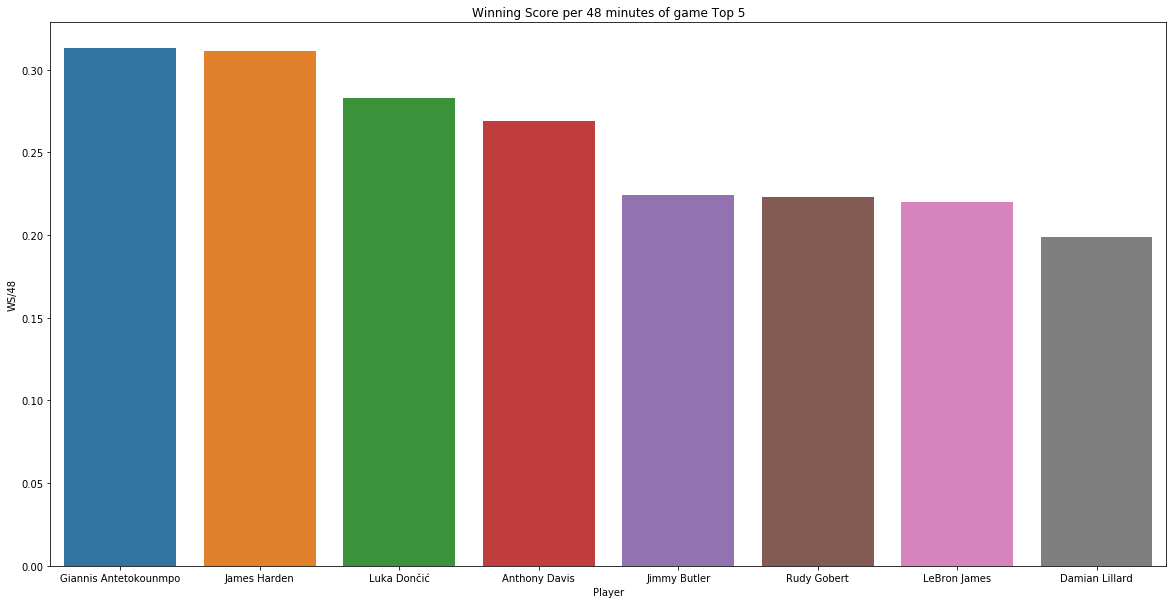

In [560]:
plt.figure(figsize=(20,10))
sns.barplot(x="Player", y="WS/48", data=top5_sorted_ws48).set_title("Winning Score per 48 minutes of game Top 5")